# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [96]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [97]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [98]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [99]:
df_train.shape

(15223, 52)

In [100]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [101]:
df_test.shape

(14910, 52)

In [102]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [145]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [148]:
df = df_test.append(df_train).reset_index(drop=True)

In [149]:
df.shape

(30133, 53)

In [143]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 53 columns):
AGREEMENT_RK                  15223 non-null int64
TARGET                        15223 non-null int64
AGE                           15223 non-null int64
SOCSTATUS_WORK_FL             15223 non-null int64
SOCSTATUS_PENS_FL             15223 non-null int64
GENDER                        15223 non-null int64
CHILD_TOTAL                   15223 non-null int64
DEPENDANTS                    15223 non-null int64
EDUCATION                     15223 non-null object
MARITAL_STATUS                15223 non-null object
GEN_INDUSTRY                  13856 non-null object
GEN_TITLE                     13856 non-null object
ORG_TP_STATE                  13856 non-null object
ORG_TP_FCAPITAL               13858 non-null object
JOB_DIR                       13856 non-null object
FAMILY_INCOME                 15223 non-null object
PERSONAL_INCOME               15223 non-null object
REG_ADDRESS_PRO

In [144]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 53 columns):
AGREEMENT_RK                  15223 non-null int64
TARGET                        15223 non-null int64
AGE                           15223 non-null int64
SOCSTATUS_WORK_FL             15223 non-null int64
SOCSTATUS_PENS_FL             15223 non-null int64
GENDER                        15223 non-null int64
CHILD_TOTAL                   15223 non-null int64
DEPENDANTS                    15223 non-null int64
EDUCATION                     15223 non-null object
MARITAL_STATUS                15223 non-null object
GEN_INDUSTRY                  13856 non-null object
GEN_TITLE                     13856 non-null object
ORG_TP_STATE                  13856 non-null object
ORG_TP_FCAPITAL               13858 non-null object
JOB_DIR                       13856 non-null object
FAMILY_INCOME                 15223 non-null object
PERSONAL_INCOME               15223 non-null object
REG_ADDRESS_PRO

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [151]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
set([u'\u0423\u0447\u0435\u043d\u0430\u044f \u0441\u0442\u0435\u043f\u0435\u043d\u044c', u'\u041d\u0435\u043f\u043e\u043b\u043d\u043e\u0435 \u0441\u0440\u0435\u0434\u043d\u0435\u0435', u'\u041d\u0435\u043e\u043a\u043e\u043d\u0447\u0435\u043d\u043d\u043e\u0435 \u0432\u044b\u0441\u0448\u0435\u0435', u'\u0414\u0432\u0430 \u0438 \u0431\u043e\u043b\u0435\u0435 \u0432\u044b\u0441\u0448\u0438\u0445 \u043e\u0431\u0440\u0430\u0437\u043e\u0432\u0430\u043d\u0438\u044f', u'\u0412\u044b\u0441\u0448\u0435\u0435', u'\u0421\u0440\u0435\u0434\u043d\u0435\u0435', u'\u0421\u0440\u0435\u0434\u043d\u0435\u0435 \u0441\u043f\u0435\u0446\u0438\u0430\u043b\u044c\u043d\u043e\u0435'])


MARITAL_STATUS
set([u'\u0420\u0430\u0437\u0432\u0435\u0434\u0435\u043d(\u0430)', u'\u0412\u0434\u043e\u0432\u0435\u0446/\u0412\u0434\u043e\u0432\u0430', u'\u041d\u0435 \u0441\u043e\u0441\u0442\u043e\u044f\u043b \u0432 \u0431\u0440\u0430\u043a\u0435', u'\u0413\u0440\u0430\u0436\u0434\u0430\u043d\u0441\u043a\u0438\u0439 \

Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [152]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

В зависимости от того на сколько пропусков в данных много. Нам в любом случае необходимо будет использовать доопределение. Однако данное доопределние может сыграть с нами злую шутку и обученная модель будет работать не эффективно.

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

Есть. (Пол, наличие автомобиля, коттеджа и тп. Форма собственности компании, образование и тп)

Необходимо их перегнать в цифровые значения, чтобы наша мат. модель могла их использовать или выбросить, чтобы алгоритм не выдал ошибку (но это будет не совсем корректно) 

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [157]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

#df['PERSONAL_INCOME']=df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
#df['CREDIT']=df['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
##df['FST_PAYMENT']=df['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
#df['LOAN_AVG_DLQ_AMT']=df['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
#df['LOAN_MAX_DLQ_AMT']=df['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
#df.info()
df=df.drop(columns=['AGREEMENT_RK','PREVIOUS_CARD_NUM_UTILIZED'])

df_train_preproc = df.query('sample == "train"').drop(['sample'], axis=1)
X_train = df_train_preproc.drop(["TARGET"], axis=1)
Y_train = df_train_preproc["TARGET"]

df_test_preproc = df.query('sample == "test"').drop(['sample'], axis=1)
X_test = df_test_preproc.drop(["TARGET"], axis=1)
Y_test = df_test_preproc["TARGET"]

le = LabelEncoder()
X_train_l = X_train.apply(le.fit_transform)
X_test_l = X_test.apply(le.fit_transform)



In [158]:

X_train.shape

(15223, 49)

In [159]:
rfc = ExtraTreesClassifier(n_estimators=250,
                             random_state=0)
rfc=rfc.fit(X_train_l, Y_train)
importances = rfc.feature_importances_



In [184]:
pd_range = pd.DataFrame(
    { "feature": X_train.columns.values,
     "importances": importances
    }
)

df_sorted = pd_range.sort_values(by=['importances'])
df_sorted[df_sorted.importances>0.03]['feature']

6                   EDUCATION
4                 CHILD_TOTAL
9                   GEN_TITLE
16      FACT_ADDRESS_PROVINCE
17    POSTAL_ADDRESS_PROVINCE
15       REG_ADDRESS_PROVINCE
44              LOAN_NUM_PAYM
19                  REGION_NM
18                TP_PROVINCE
8                GEN_INDUSTRY
33                       TERM
14            PERSONAL_INCOME
38                  WORK_TIME
37           FACT_LIVING_TERM
32                     CREDIT
0                         AGE
34                FST_PAYMENT
Name: feature, dtype: object

In [213]:
l=df_sorted[df_sorted.importances>0.03]['feature'].values.tolist()
l.append(u'sample')
l.append(u'TARGET')
l

[u'EDUCATION',
 u'CHILD_TOTAL',
 u'GEN_TITLE',
 u'FACT_ADDRESS_PROVINCE',
 u'POSTAL_ADDRESS_PROVINCE',
 u'REG_ADDRESS_PROVINCE',
 u'LOAN_NUM_PAYM',
 u'REGION_NM',
 u'TP_PROVINCE',
 u'GEN_INDUSTRY',
 u'TERM',
 u'PERSONAL_INCOME',
 u'WORK_TIME',
 u'FACT_LIVING_TERM',
 u'CREDIT',
 u'AGE',
 u'FST_PAYMENT',
 u'sample',
 u'TARGET']

In [214]:
df_imp = df[l]
df_imp_mean = df_imp.fillna(df_imp.mean())

In [215]:
df_imp_mean

,EDUCATION,CHILD_TOTAL,GEN_TITLE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,REG_ADDRESS_PROVINCE,LOAN_NUM_PAYM,REGION_NM,TP_PROVINCE,GEN_INDUSTRY,TERM,PERSONAL_INCOME,WORK_TIME,FACT_LIVING_TERM,CREDIT,AGE,FST_PAYMENT,sample,TARGET
0,Среднее специальное,1,Специалист,Красноярский край,Красноярский край,Красноярский край,8,ВОСТОЧНО-СИБИРСКИЙ,Красноярский край,Образование,5,7000,39.000000,96,3016.80,30,335.20,test,0
1,Среднее,0,NaN,Орловская область,Орловская область,Орловская область,15,ЦЕНТРАЛЬНЫЙ 1,Орловская область,NaN,6,4100,189.582069,299,6000.00,48,2000.00,test,0
2,Среднее,1,Специалист,Коми,Коми,Коми,1,ЦЕНТРАЛЬНЫЙ 2,Коми,Металлургия/Промышленность/Машиностроение,6,40000,156.000000,19,10000.00,35,2490.00,test,0
3,Среднее,0,Специалист,Читинская область,Читинская область,Читинская область,9,ВОСТОЧНО-СИБИРСКИЙ,Читинская область,Другие сферы,4,20000,9.000000,252,5175.00,22,575.00,test,0
4,Высшее,2,Специалист,Хабаровский край,Хабаровский край,Хабаровский край,5,ДАЛЬНЕВОСТОЧНЫЙ,Хабаровский край,Образование,6,17000,84.000000,36,13065.00,27,10000.00,test,0
5,Среднее специальное,2,NaN,Кировская область,Кировская область,Кировская область,5,ПРИВОЛЖСКИЙ,Кировская область,NaN,5,7000,189.582069,84,13824.20,44,10239.00,test,0
6,Среднее,0,Специалист,Курганская область,Курганская область,Курганская область,14,УРАЛЬСКИЙ,Курганская область,Сборочные производства,3,10000,444.000000,300,8900.00,57,1000.00,test,0
7,Среднее специальное,2,Специалист,Томская область,Томская область,Томская область,5,ЗАПАДНО-СИБИРСКИЙ,Томская область,Образование,12,7500,144.000000,24,8590.00,33,5000.00,test,0
8,Среднее специальное,2,NaN,Омская область,Омская область,Омская область,4,ЗАПАДНО-СИБИРСКИЙ,Омская область,NaN,5,9000,189.582069,276,12521.00,53,659.00,test,0
9,Неполное среднее,1,Рабочий,Оренбургская область,Оренбургская область,Оренбургская область,6,ПОВОЛЖСКИЙ,Оренбургская область,Торговля,6,4000,36.000000,65,6903.00,33,767.00,test,1


In [216]:
df_train_preproc = df_imp_mean.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_imp_mean.query('sample == "test"').drop(['sample'], axis=1)

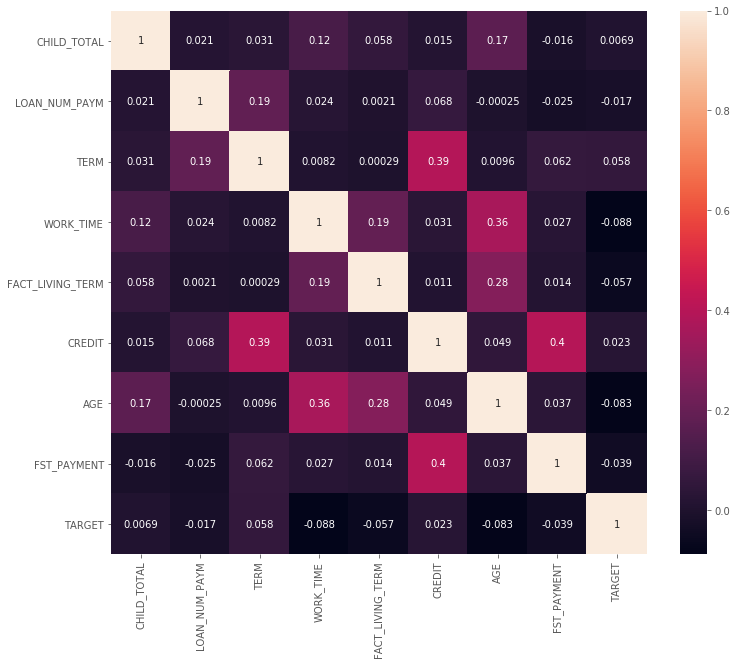

In [218]:
# Посмотрим, какие зависимости есть при помощи графика. Возможно, после можно вернуться и уменьшить кол=во признаков.
import seaborn as sns
import matplotlib.pyplot as plt
# sns.pairplot(df, hue='default.payment.next.month');
plt.figure(figsize=(12, 10))
sns.heatmap(df_train_preproc.corr('kendall'), annot=True);


In [217]:
# Делаем OneHotEncoding на весь датасет. Возможно было бы лучше выделить LabelEncoding отдельно, но попробуем так.
df_train_preproc_OHE = pd.get_dummies(df_train_preproc)
df_test_preproc_OHE = pd.get_dummies(df_test_preproc)
df_train_preproc_OHE.head()

,CHILD_TOTAL,LOAN_NUM_PAYM,TERM,WORK_TIME,FACT_LIVING_TERM,CREDIT,AGE,FST_PAYMENT,TARGET,EDUCATION_Высшее,...,PERSONAL_INCOME_9300,PERSONAL_INCOME_9330,PERSONAL_INCOME_9340,PERSONAL_INCOME_9400,PERSONAL_INCOME_9500,PERSONAL_INCOME_9600,PERSONAL_INCOME_9628,PERSONAL_INCOME_9700,PERSONAL_INCOME_9800,PERSONAL_INCOME_9900
14910,2,6,6,18.0,220,8000.00,49,8650.0,0,0,...,0,0,0,0,0,0,0,0,0,0
14911,3,6,6,97.0,137,21650.00,32,4000.0,0,0,...,0,0,0,0,0,0,0,0,0,0
14912,4,11,12,84.0,251,33126.00,52,4000.0,0,0,...,0,0,0,0,0,0,0,0,0,0
14913,1,6,6,168.0,36,8491.82,39,5000.0,0,1,...,0,0,0,0,0,0,0,0,0,0
14914,0,16,12,101.0,83,21990.00,30,4000.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1]:
# def preproc_data(df_input):
#     df_output = df_input.copy()
#     df_output.drop(columns=['AGREEMENT_RK'])
    
    
    
#     collumns = ['CREDIT', 'FST_PAYMENT', "LOAN_AVG_DLQ_AMT", "LOAN_MAX_DLQ_AMT"]
#     for collumn in collumns:
#         df[collumn].map(lambda x: x.replace(',', '.')).astype('float')
    
#     df_input = df_input.drop(['PREVIOUS_CARD_NUM_UTILIZED'], axis = 1)
#     ## Your Code Here
    
#     return df_output

In [ ]:
# df_preproc = df.pipe(preproc_data)

# df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
# df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [222]:
X_train_set = df_train_preproc_OHE.drop(["TARGET"], axis=1)
Y_train_set = df_train_preproc_OHE["TARGET"]

X_test_set = df_test_preproc_OHE.drop(["TARGET"], axis=1)
Y_test_set = df_test_preproc_OHE["TARGET"]

#### Задание 5. Обучение и оценка качества разных моделей

In [224]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

X_train, X_test, Y_train, Y_test = train_test_split(X_train_set, Y_train_set, test_size=0.3, random_state=42)


In [228]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

dtc = DecisionTreeClassifier(random_state=42, max_depth=5)
dtc.fit(X_train, Y_train)
dtc_predict = dtc.predict(X_test)
dtc_predict_proba = dtc.predict_proba(X_test)

rfc = RandomForestClassifier(random_state=42, max_depth=15)
rfc.fit(X_train, Y_train)
rfc_predict = rfc.predict(X_test)
rfc_predict_proba = rfc.predict_proba(X_test)

lr = LogisticRegression(random_state=42)
lr.fit(X_train, Y_train)
lr_predict = lr.predict(X_test)
lr_predict_proba = lr.predict_proba(X_test)

In [229]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

def print_accur_precision_recal(method_name, true_val, predicted_val):
    print(method_name)
    print("Accuracy:  " + str(accuracy_score(true_val, predicted_val)))
    print("Precision: " + str(precision_score(true_val, predicted_val)))
    print("Recal:     " + str(recall_score(true_val, predicted_val)))
    print ()

print_accur_precision_recal("Decision Tree", Y_test, dtc_predict)
print_accur_precision_recal("Random Forest Tree", Y_test, rfc_predict)
print_accur_precision_recal("LogisticRegression", Y_test, lr_predict)

Decision Tree
Accuracy:  0.875848478213269
Precision: 0.2
Recal:     0.007207207207207207
()
Random Forest Tree
Accuracy:  0.8786949857674622
Precision: 0.6666666666666666
Recal:     0.0036036036036036037
()
LogisticRegression
Accuracy:  0.8784760236479089
Precision: 0.0
Recal:     0.0
()


In [232]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает

acc_pre_rec = pd.DataFrame(index=['accuracy', 'precision', 'recall',])
acc_pre_rec['DecisionTree'] = [accuracy_score(Y_test, dtc_predict), precision_score(Y_test, dtc_predict), recall_score(Y_test, dtc_predict)]
acc_pre_rec['RandomForest'] = [accuracy_score(Y_test, rfc_predict), precision_score(Y_test, rfc_predict), recall_score(Y_test, rfc_predict)]
acc_pre_rec['LogisticRegression'] = [accuracy_score(Y_test, lr_predict), precision_score(Y_test, lr_predict), recall_score(Y_test, lr_predict)]

acc_pre_rec

,DecisionTree,RandomForest,LogisticRegression
accuracy,0.875848,0.878695,0.878476
precision,0.200000,0.666667,0.000000
recall,0.007207,0.003604,0.000000


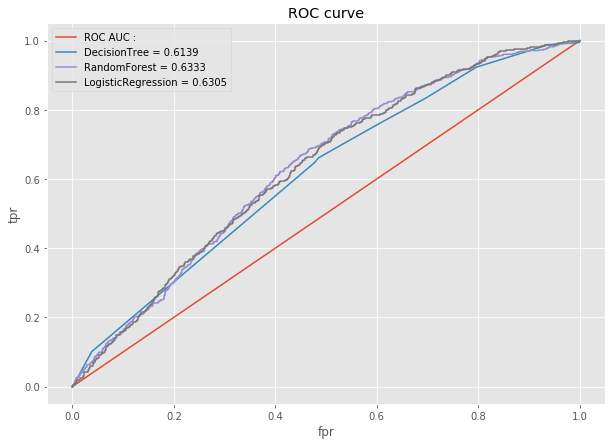

In [238]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии
from sklearn.metrics import roc_auc_score, roc_curve
def roc_auc_plot(y_valid, predict, legend_ls, name):
    fpr, tpr, thresholds = roc_curve(y_valid, predict)
    plt.plot(fpr, tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('ROC curve')
    legend_ls.append(name+' = '+str(round(roc_auc_score(y_valid, predict),4)))
    plt.legend(legend_ls)

plt.figure(figsize=(10, 7))
legend_ls = ['ROC AUC :',]
plt.plot([0, 1], [0, 1])
roc_auc_plot(Y_test, dtc_predict_proba[:,1], legend_ls, 'DecisionTree')
roc_auc_plot(Y_test, rfc_predict_proba[:,1], legend_ls, 'RandomForest')
roc_auc_plot(Y_test, lr_predict_proba[:,1], legend_ls, 'LogisticRegression')
plt.legend(legend_ls)
plt.show()

In [244]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

print('DecisionTree:       ' +  str(cross_val_score(DecisionTreeClassifier(random_state=42, max_depth=5),
                X_train,Y_train,scoring='roc_auc',cv = 10).mean()))
print('RandomForest:       ' + str(cross_val_score(RandomForestClassifier(random_state=42, max_depth=15),
                X_train,Y_train,scoring='roc_auc',cv = 10).mean()))
print('LogisticRegression: ' + str(cross_val_score(LogisticRegression(random_state=42),
                X_train,Y_train,scoring='roc_auc',cv = 10).mean()))



DecisionTree:       0.5851539789251753
RandomForest:       0.6014768475808514
LogisticRegression: 0.6075722588323391


In [247]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки
rfc = RandomForestClassifier(random_state=42, max_depth=15)
rfc.fit(X_train, Y_train)
predict = rfc.predict_proba(X_test)
print (roc_auc_score(y_true=Y_test, y_score=predict[:,1]))
## Your Code Here

0.6332859529519549


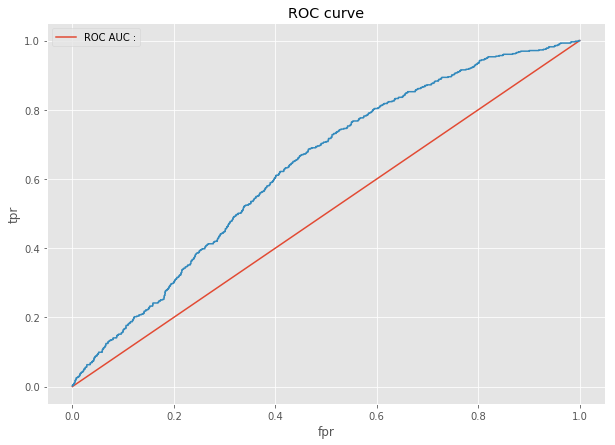

In [249]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)
plt.figure(figsize=(10, 7))
 
plt.plot([0, 1], [0, 1])
roc_auc_plot(Y_test, predict[:,1], ['ROC AUC :',], 'LogisticRegression')
plt.legend(['ROC AUC :',])
plt.show()

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [1]:
### И далее ;)